In [7]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import pandas as pd
from pandas.plotting import autocorrelation_plot 
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings("ignore")

207


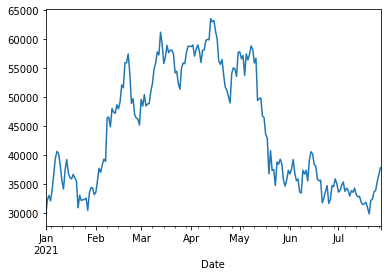

In [40]:
df = pd.read_csv('BTCs.csv', header=0, parse_dates=[0],index_col=0,squeeze=True)
df.index = df.index.to_period('D')
print(len(df))
df.plot()
pyplot.show()

In [41]:
len(df)

207

In [42]:
dff = np.log(df) - np.log(df.shift(1))
dff.head()

Date
2021-07-27         NaN
2021-07-25   -0.065447
2021-07-24   -0.045266
2021-07-23   -0.006570
2021-07-22   -0.039591
Freq: D, Name: Price, dtype: float64

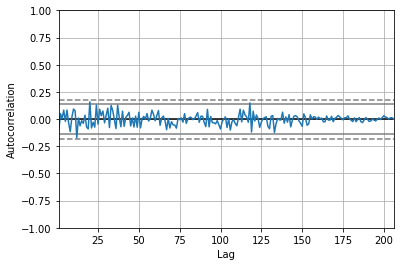

In [44]:
autocorrelation_plot(dff[1:])
pyplot.show()

In [45]:
index = 0
P=[]
Q=[]
C=[]
aic_data = []
bic_data = []
for p in range (8):
    for q in range (8):
        for c in range (8):
            print("Index =", index)
            try:
                model = ARIMA(dff, order=(p,q,c))
                model_fit = model.fit()
                print("p = {0}, q = {1}, c = {2}, Aic: {3}, Bic: {4}".format(p,q,c,model_fit.aic,model_fit.bic))
                print("The difference is: {0}\n".format(model_fit.aic - model_fit.bic))
                P.append(p)
                Q.append(q)
                C.append(c)
                aic_data.append(model_fit.aic)
                bic_data.append(model_fit.bic)
            except np.linalg.LinAlgError:
                print("----ERROR!----")
                print("p = {0}, q = {1}, c = {2}, Aic: {3}, Bic: {4}".format(p,q,c,np.nan,np.nan))
                P.append(p)
                Q.append(q)
                C.append(c)
                aic_data.append(np.nan)
                bic_data.append(np.nan)
                print("----ERROR!---- \n")
                pass
            index = index + 1
maindata = list(zip(P,Q,C,aic_data,bic_data))

Index = 0
p = 0, q = 0, c = 0, Aic: -668.6862265715187, Bic: -662.0207889849879
The difference is: -6.665437586530743

Index = 1
p = 0, q = 0, c = 1, Aic: -668.7182288247482, Bic: -658.720072444952
The difference is: -9.998156379796114

Index = 2
p = 0, q = 0, c = 2, Aic: -667.2417371928891, Bic: -653.9108620198276
The difference is: -13.330875173061486

Index = 3
p = 0, q = 0, c = 3, Aic: -665.3206321173603, Bic: -648.6570381510335
The difference is: -16.663593966326857

Index = 4
p = 0, q = 0, c = 4, Aic: -664.9303881147582, Bic: -644.934075355166
The difference is: -19.99631275959223

Index = 5
p = 0, q = 0, c = 5, Aic: -662.9386670192432, Bic: -639.6096354663856
The difference is: -23.3290315528576

Index = 6
p = 0, q = 0, c = 6, Aic: -662.181089108253, Bic: -635.51933876213
The difference is: -26.66175034612297

Index = 7
p = 0, q = 0, c = 7, Aic: -661.6872600910544, Bic: -631.6927909516661
The difference is: -29.994469139388343

Index = 8
p = 0, q = 1, c = 0, Aic: -491.1942169010

p = 1, q = 0, c = 5, Aic: -660.9305143664574, Bic: -634.2687640203344
The difference is: -26.66175034612297

Index = 70
p = 1, q = 0, c = 6, Aic: -660.5594260411851, Bic: -630.5649569017968
The difference is: -29.994469139388343

Index = 71
p = 1, q = 0, c = 7, Aic: -660.4136603669774, Bic: -627.0864724343237
The difference is: -33.327187932653715

Index = 72
p = 1, q = 1, c = 0, Aic: -569.5138569484518, Bic: -562.8581046108726
The difference is: -6.655752337579202

Index = 73
p = 1, q = 1, c = 1, Aic: -644.304675479526, Bic: -634.3210469731573
The difference is: -9.983628506368746

Index = 74
p = 1, q = 1, c = 2, Aic: -642.6835858553006, Bic: -629.3720811801423
The difference is: -13.31150467515829

Index = 75
p = 1, q = 1, c = 3, Aic: -640.7366568803345, Bic: -624.0972760363866
The difference is: -16.639380843947947

Index = 76
p = 1, q = 1, c = 4, Aic: -638.8139750132211, Bic: -618.8467180004836
The difference is: -19.96725701273749

Index = 77
p = 1, q = 1, c = 5, Aic: -638.0949512

p = 2, q = 1, c = 2, Aic: -640.5194725413037, Bic: -623.8800916973557
The difference is: -16.639380843947947

Index = 139
p = 2, q = 1, c = 3, Aic: -638.7476266289777, Bic: -618.7803696162403
The difference is: -19.96725701273749

Index = 140
p = 2, q = 1, c = 4, Aic: -637.0088145219838, Bic: -613.7136813404568
The difference is: -23.295133181527035

Index = 141
p = 2, q = 1, c = 5, Aic: -635.5729410850561, Bic: -608.9499317347394
The difference is: -26.623009350316693

Index = 142
p = 2, q = 1, c = 6, Aic: -634.0796647646471, Bic: -604.1287792455408
The difference is: -29.950885519106237

Index = 143
p = 2, q = 1, c = 7, Aic: -642.8774625964445, Bic: -609.5987009085487
The difference is: -33.27876168789578

Index = 144
p = 2, q = 2, c = 0, Aic: -453.4311059930762, Bic: -443.462076055661
The difference is: -9.9690299374152

Index = 145
p = 2, q = 2, c = 1, Aic: -581.6966157497225, Bic: -568.4045758331688
The difference is: -13.292039916553676

Index = 146
p = 2, q = 2, c = 2, Aic: -625

p = 3, q = 1, c = 6, Aic: -638.0111262762248, Bic: -604.732364588329
The difference is: -33.27876168789578

Index = 207
p = 3, q = 1, c = 7, Aic: -635.4632476824157, Bic: -598.8566098257303
The difference is: -36.60663785668544

Index = 208
p = 3, q = 2, c = 0, Aic: -498.82380570288797, Bic: -485.53176578633435
The difference is: -13.29203991655362

Index = 209
p = 3, q = 2, c = 1, Aic: -599.4877086677968, Bic: -582.8726587721047
The difference is: -16.615049895692096

Index = 210
p = 3, q = 2, c = 2, Aic: -618.7661622260641, Bic: -598.8281023512337
The difference is: -19.9380598748304

Index = 211
p = 3, q = 2, c = 3, Aic: -621.5310747002668, Bic: -598.270004846298
The difference is: -23.26106985396882

Index = 212
p = 3, q = 2, c = 4, Aic: -624.2569600000049, Bic: -597.6728801668977
The difference is: -26.58407983310724

Index = 213
p = 3, q = 2, c = 5, Aic: -617.2874679649005, Bic: -587.3803781526549
The difference is: -29.90708981224566

Index = 214
p = 3, q = 2, c = 6, Aic: -626.5

p = 4, q = 2, c = 2, Aic: -574.0210601450528, Bic: -550.759990291084
The difference is: -23.26106985396882

Index = 275
p = 4, q = 2, c = 3, Aic: -600.4548464941946, Bic: -573.8707666610874
The difference is: -26.58407983310724

Index = 276
p = 4, q = 2, c = 4, Aic: -619.187732393083, Bic: -589.2806425808374
The difference is: -29.90708981224566

Index = 277
p = 4, q = 2, c = 5, Aic: -616.358958545555, Bic: -583.1288587541709
The difference is: -33.23009979138408

Index = 278
p = 4, q = 2, c = 6, Aic: -626.7594564483753, Bic: -590.2063466778528
The difference is: -36.5531097705225

Index = 279
p = 4, q = 2, c = 7, Aic: -621.1543713367953, Bic: -581.2782515871344
The difference is: -39.876119749660916

Index = 280
p = 4, q = 3, c = 0, Aic: -385.2697813562413, Bic: -368.6791813870202
The difference is: -16.590599969221103

Index = 281
p = 4, q = 3, c = 1, Aic: -503.39975004910525, Bic: -483.4910300860399
The difference is: -19.908719963065323

Index = 282
p = 4, q = 3, c = 2, Aic: -543.3

p = 5, q = 2, c = 6, Aic: -621.9185484198779, Bic: -582.042428670217
The difference is: -39.876119749660916

Index = 343
p = 5, q = 2, c = 7, Aic: -617.9400071387182, Bic: -574.7408774099189
The difference is: -43.199129728799335

Index = 344
p = 5, q = 3, c = 0, Aic: -411.6647548056086, Bic: -391.7560348425433
The difference is: -19.908719963065323

Index = 345
p = 5, q = 3, c = 1, Aic: -507.9319943203441, Bic: -484.70515436343453
The difference is: -23.226839956909544

Index = 346
p = 5, q = 3, c = 2, Aic: -499.7347482669818, Bic: -473.1897883162281
The difference is: -26.544959950753707

Index = 347
p = 5, q = 3, c = 3, Aic: -580.8866831904609, Bic: -551.0236032458629
The difference is: -29.863079944597985

Index = 348
p = 5, q = 3, c = 4, Aic: -535.7540932950576, Bic: -502.57289335661545
The difference is: -33.18119993844215

Index = 349
p = 5, q = 3, c = 5, Aic: -554.9803479480161, Bic: -518.4810280157296
The difference is: -36.499319932286426

Index = 350
p = 5, q = 3, c = 6, Aic

p = 6, q = 3, c = 2, Aic: -531.605992892084, Bic: -501.7429129474861
The difference is: -29.863079944597928

Index = 411
p = 6, q = 3, c = 3, Aic: -587.1596615677017, Bic: -553.9784616292595
The difference is: -33.181199938442205

Index = 412
p = 6, q = 3, c = 4, Aic: -554.841871259204, Bic: -518.3425513269176
The difference is: -36.499319932286426

Index = 413
p = 6, q = 3, c = 5, Aic: -579.317031936372, Bic: -539.4995920102415
The difference is: -39.81743992613053

Index = 414
p = 6, q = 3, c = 6, Aic: -557.4301514033125, Bic: -514.2945914833376
The difference is: -43.13555991997487

Index = 415
p = 6, q = 3, c = 7, Aic: -587.6158900567747, Bic: -541.1622101429557
The difference is: -46.45367991381897

Index = 416
p = 6, q = 4, c = 0, Aic: -312.74614581496314, Bic: -289.55370396167064
The difference is: -23.192441853292507

Index = 417
p = 6, q = 4, c = 1, Aic: -435.56136569673924, Bic: -409.0557178644049
The difference is: -26.50564783233432

Index = 418
p = 6, q = 4, c = 2, Aic: -5

p = 7, q = 3, c = 6, Aic: -579.7955280375951, Bic: -533.3418481237761
The difference is: -46.45367991381897

Index = 479
p = 7, q = 3, c = 7, Aic: -557.2482652235288, Bic: -507.4764653158656
The difference is: -49.77179990766325

Index = 480
p = 7, q = 4, c = 0, Aic: -355.9288131868502, Bic: -329.4231653545159
The difference is: -26.50564783233432

Index = 481
p = 7, q = 4, c = 1, Aic: -460.78834883543334, Bic: -430.96949502405727
The difference is: -29.818853811376073

Index = 482
p = 7, q = 4, c = 2, Aic: -436.23648472216604, Bic: -403.10442493174816
The difference is: -33.132059790417884

Index = 483
p = 7, q = 4, c = 3, Aic: -495.14185947097053, Bic: -458.6965937015109
The difference is: -36.44526576945964

Index = 484
p = 7, q = 4, c = 4, Aic: -498.1714428990181, Bic: -458.4129711505166
The difference is: -39.75847174850145

Index = 485
p = 7, q = 4, c = 5, Aic: -554.8601421200738, Bic: -511.7884643925305
The difference is: -43.07167772754326

Index = 486
p = 7, q = 4, c = 6, Aic:

In [46]:
print("Min Aic: {0}, at index {1}".format(np.nanmin(aic_data),np.nanargmin(aic_data)))
print(maindata[np.nanargmin(aic_data)])
print("-------------------------------------------------------------------------------")
print("Min BIC: {0}, at index {1}".format(np.nanmin(bic_data),np.nanargmin(bic_data)))
print(maindata[np.nanargmin(bic_data)])
print("-------------------------------------------------------------------------------")
print("Max Aic: {0}, at index {1}".format(np.nanmax(aic_data),np.nanargmax(aic_data)))
print(maindata[np.nanargmax(aic_data)])
print("-------------------------------------------------------------------------------")
print("Max BIC: {0}, at index {1}".format(np.nanmax(bic_data),np.nanargmax(bic_data)))
print(maindata[np.nanargmax(bic_data)])


Min Aic: -668.9102703790733, at index 64
(1, 0, 0, -668.9102703790733, -658.9121139992772)
-------------------------------------------------------------------------------
Min BIC: -662.0207889849879, at index 0
(0, 0, 0, -668.6862265715187, -662.0207889849879)
-------------------------------------------------------------------------------
Max Aic: 1029.5770254919876, at index 56
(0, 7, 0, 1029.5770254919876, 1032.8753428585355)
-------------------------------------------------------------------------------
Max BIC: 1032.8753428585355, at index 56
(0, 7, 0, 1029.5770254919876, 1032.8753428585355)


In [32]:
model = ARIMA(df, order=(1,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.aic)
print(model_fit.summary())

3746.586869693807
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  207
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1870.293
Date:                Tue, 27 Jul 2021   AIC                           3746.587
Time:                        18:27:28   BIC                           3756.585
Sample:                             0   HQIC                          3750.630
                                - 207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.427e+04   7067.964      6.264      0.000    3.04e+04    5.81e+04
ar.L1          0.9813      0.015     64.843      0.000       0.952       1.011
sigma2      4.071e+06   3.11e+05  

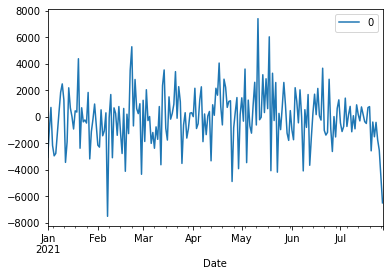

In [33]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

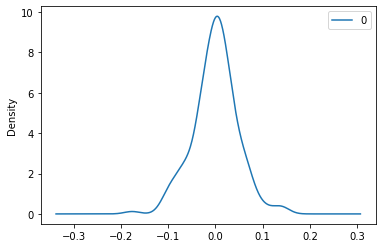

                0
count  206.000000
mean    -0.000028
std      0.047141
min     -0.176400
25%     -0.026440
50%      0.001540
75%      0.028222
max      0.145925


In [16]:
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

predicted=62923.181179, expected=62980.400000
predicted=62693.501094, expected=63540.900000
predicted=63265.010520, expected=59863.800000
predicted=59565.993042, expected=59978.700000
predicted=59687.895763, expected=59748.400000
predicted=59463.940604, expected=58118.700000
predicted=57842.277416, expected=58077.400000
predicted=57806.893298, expected=55948.700000
predicted=55695.009884, expected=57996.300000
predicted=57731.004250, expected=58993.400000
predicted=58727.867073, expected=58199.900000
predicted=57943.585893, expected=57059.900000
predicted=56815.025128, expected=58977.300000
predicted=58723.569324, expected=58718.300000
predicted=58470.807605, expected=58763.700000
predicted=58520.665345, expected=58771.300000
predicted=58532.745876, expected=57616.200000
predicted=57388.399606, expected=55765.200000
predicted=55556.981514, expected=55862.900000
predicted=55657.014649, expected=55036.100000
predicted=54842.251527, expected=51322.300000
predicted=51181.279881, expected=5

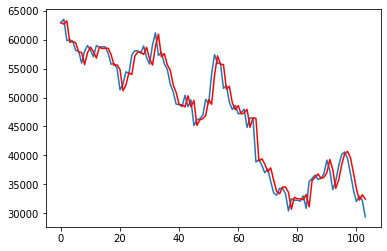

In [36]:
X = df.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()